# Figure 2 - Characteristics of sex-biased alternative splicing.

This will need to become Figure 3.



## Figure 2b `Sex-biased alternative splicing index for each chromosome.`

This plot is based upon a file 'SplicingIndex_chr.tsv' that was generated by xx program.   It is sorted
in decreasing order by index, and the size of the circle reflects XXXX.

## Loading dependencies

In [1]:
library(ggplot2)
Sys.setenv(TAR = "/bin/tar") # for gzfile

In [ ]:
# set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.5)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)

## Figure 2c - Proportions of AS events that were strictly tissue specific, present in 2-5, or over 5 tissues

## Loading dependencies

In [35]:
dat <- read.table("../data/genesWithCommonAS.tsv", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
head(dat)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,335,39
2,DDX3X,96,20
3,KDM5C,47,33
4,ZFX,47,27
5,KDM6A,27,24
6,UCA1,25,1


## Getting Proportions
Making a table of the number of tissues per gene will get us the 
numbers we need for the proportions of alternative splicing events (AS) 
that are strictly tissue specific

In [36]:
tissue_specificity_cnt <- table(dat$Tissues)
tissue_specificity_cnt


   1    2    3    4    5    6    8    9   10   13   20   24   27   33   39 
2578  269   32    6    2    2    2    1    1    1    1    1    1    1    1 

### Make an Array of the table
Make an array of the table to access the values based upon the index

In [37]:
a <- unclass(tissue_specificity_cnt)
a

1    2    3    4    5    6    8    9   10   13   20   24   27   33   39 
2578  269   32    6    2    2    2    1    1    1    1    1    1    1    1

####  Names for logic

Using the names of this array contain the numbers of genes
with those number of splicing events, which we then can use for logical reasoning, such as number of genes that have tissue specific splicing events.  The length of this vector is equal to the length of the array.
Using this logical value within the array will allow us to sum the events for our figure.

In [38]:
tissue_cnts <- as.numeric(unclass(names(a)))
tissue_cnts == 1
a[tissue_cnts == 1]
low_cnt <- sum(as.numeric(a[tissue_cnts == 1]))
low_cnt

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE

1 
2578

[1] 2578

In [39]:
a[tissue_cnts > 1 & tissue_cnts < 6]
medium_cnt <- sum(as.numeric(a[tissue_cnts > 1 & tissue_cnts < 6]))
medium_cnt

2   3   4   5 
269  32   6   2

[1] 309

In [40]:
a[tissue_cnts > 4]
high_cnt <- sum(as.numeric(a[tissue_cnts > 4]))
high_cnt

5  6  8  9 10 13 20 24 27 33 39 
 2  2  2  1  1  1  1  1  1  1  1

[1] 14

In [41]:
## set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.8)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)


## Figure 2d - Genes with over 10 significant sex-biased AS events.

PREVIOUS VERSION Most of the AS events were specific to one tissue, but slightly over 12% were found in 2-5 tissues, with only 9 AS events being found in more than 5 tissues (Fig. 2c). 27 genes were found to have >10 AS events (Fig. 2d). 

-- We basically need to count the number of tissues per AS event (Figure 2c) and the number of AS events per gene (FIgure 2d)



The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

## Loading dependencies

According to installation instructions here https://github.com/tidyverse/dplyr it is recommended to just install the whole tidyverse.

In [43]:
library(tidyverse)
library(ggplot2)
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

Warning message:
“package ‘readr’ was built under R version 3.6.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()



Read in the output of the XX script.

In [45]:
dat <- read.table("../data/genesWithCommonAS.tsv", sep = "\t", quote = NULL,
                  stringsAsFactors = TRUE,
                  header=TRUE)
head(dat)
dim(dat)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,335,39
2,DDX3X,96,20
3,KDM5C,47,33
4,ZFX,47,27
5,KDM6A,27,24
6,UCA1,25,1


[1] 2899    3

Remove all genes that have less than 10 splicing events.

In [46]:
res <- dat[dat$n > 10,]
head(res)
dim(res)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,335,39
2,DDX3X,96,20
3,KDM5C,47,33
4,ZFX,47,27
5,KDM6A,27,24
6,UCA1,25,1


[1] 37  3

Arrange the data in descending order in terms of the number of splicing events per gene

In [47]:
res <- res[order(res$n, decreasing=TRUE),]
head(res)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,335,39
2,DDX3X,96,20
3,KDM5C,47,33
4,ZFX,47,27
5,KDM6A,27,24
6,UCA1,25,1


Make sure the GeneSymbols are treated as factors, to ease the plotting.


In [48]:
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)

Now make the plot, using viridis to fill the dots according to the amount of splicing per tissue.  The number of splicing events per gene does not necessarily correlate with the number of tissues that gene is involved with splicing.  Fewer tissues, more splicing events, mean that within a tissue there are more splicing events.  More Tissues and fewer splicing events for that gene indicates a level of tissue specificity with the splicing.

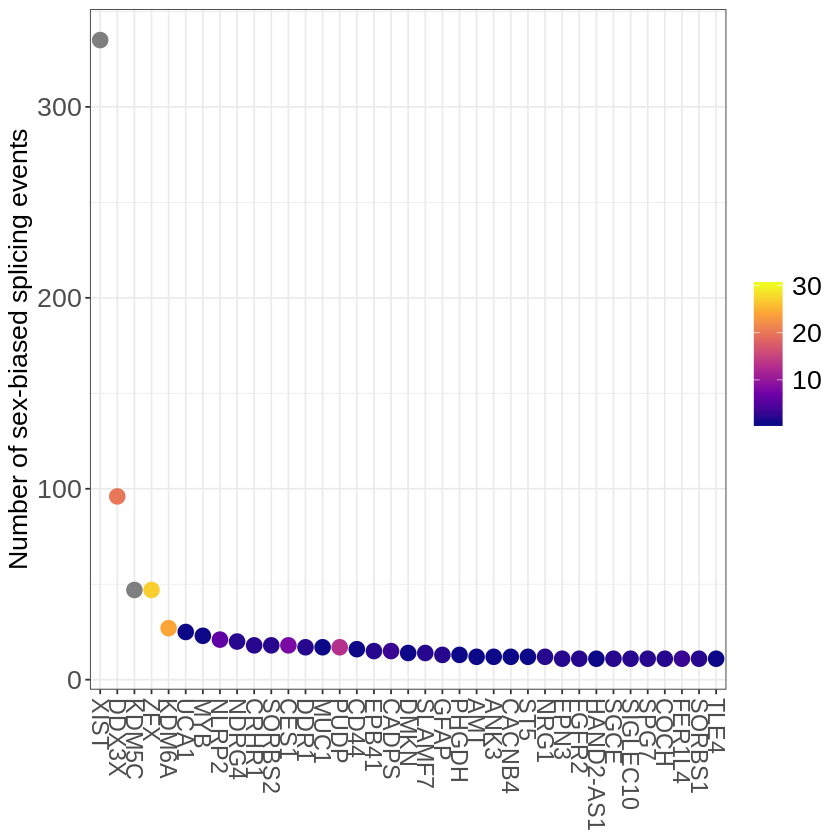

In [49]:
p<-ggplot(res, aes(x = GeneSymbol, y = n)) +
  geom_point(size = 4, aes(fill = Tissues, color = Tissues)) +
  theme_bw() +
  theme(axis.text.x = element_text(size=14, angle = 270, hjust = 0.0, vjust = 0.5),
        axis.text.y = element_text(size=16),
        axis.title.x = element_blank(),
        axis.title.y = element_text(face="plain", colour="black", 
                                    size=16),
        legend.title=element_blank(),
        legend.text = element_text(face="plain", colour="black", 
                                   size=16)) +
  scale_fill_viridis_c(aesthetics = c("colour", "fill"),
                       option = "plasma",
                       limits = c(1, 30), breaks = c(10, 20, 30)) +
  ylab(paste("Number of sex-biased splicing events"))

p


Save the figure to the pdf directory

In [ ]:
ggsave(file = "../pdf/Figure2d.pdf", plot = p)

## Figure 2e - Genes with over 10 significant sex-biased AS events.

The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

## Loading dependencies

In [50]:
library(viridis)
library(ggplot2)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

## Reading the Significant Splicing Events by Tissue Results

Starting with the output from running xx script, this file that summarizes the significant splicing events by tissue is then limited to only those tissues that have greater than 10 splicing events, and then the distribution of the 5 splicing events, A3SS, A5SS, RI, SE, and MXE as a percentage of the whole are compared between the tissues.

In [52]:
df <- read.table(file ="../data/gene_as.tsv",
                sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(df)

,GeneJunction,ASE,ASE_IDX,Tissue,GeneSymbol,chr
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,XIST-2253,SE,2253,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13
2,XIST-2252,SE,2252,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13
3,GREB1L-4933,SE,4933,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,AKT1,chr14
4,RHCG-1776,SE,1776,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,MLF1,chr3
5,XIST-2253,SE,2253,adipovisceral_omentum_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13
6,XIST-2252,SE,2252,adipovisceral_omentum_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13


Another file, which created simplifying labels is read in as well.   It is produced by XX script.

In [53]:
totals <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2e_test_file/Totals_by_tissue_annotated.txt", 
                     sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(totals)

,Tissue,Total,Label
,<chr>,<int>,<chr>
1,Adipose - Subcutaneous,52,Adipose (S)
2,Adipose - Visceral (Omentum),9,Adipose (V)
3,Adrenal Gland,147,Adrenal Glad
4,Artery - Aorta,31,Aorta
5,Artery - Coronary,6,Coronary Artery
6,Artery - Tibial,21,Tibial Artery


Using the summarizing label, where the tissues match, annotated, to summarized output, we provide the annotation label.  This will help us make the figure with cleaner labels.

In [54]:
idx <- match(df$Tissue, totals$Tissue)
df$Label <- totals$Label[idx]
df$Label <- factor(df$Label, levels = totals$Label)

dim(df)
dim(totals)
head(df)

[1] 6370    7

[1] 37  3

,GeneJunction,ASE,ASE_IDX,Tissue,GeneSymbol,chr,Label
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<fct>
1,XIST-2253,SE,2253,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13,NA
2,XIST-2252,SE,2252,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13,NA
3,GREB1L-4933,SE,4933,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,AKT1,chr14,NA
4,RHCG-1776,SE,1776,adiposubcutaneous_AS_model_B_sex_as_events_refined.csv,MLF1,chr3,NA
5,XIST-2253,SE,2253,adipovisceral_omentum_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13,NA
6,XIST-2252,SE,2252,adipovisceral_omentum_AS_model_B_sex_as_events_refined.csv,DLEU1,chr13,NA


Just as a check, lets ensure that the total splicing events has not been altered.

In [55]:
sum(df$Counts)
sum(totals$Total)


[1] 0

[1] 7222

What is the distribution of the one file with annotation for the various counts of splicing events.

In [56]:
table(totals$Total)


   0    1    2    3    4    5    6    8    9   11   12   16   18   21   26   30 
   2    2    2    4    2    2    2    3    2    1    1    1    1    1    1    1 
  31   44   52   76  147  377 2072 4168 
   2    1    1    1    1    1    1    1 

One might expect greater granularity in the significant events file, that is not summarized, and as expected, the totals are lower as they are not summarized by tissue, but still broken out by each of the splicing events, which we want to preserve for this figure.

In [57]:
table(df$Counts)

< table of extent 0 >

We are limiting the figure to only those tissues that have greater than ten splicing events.

In [58]:
tissues_keep <- totals[totals$Total > 10,]
head(tissues_keep)

,Tissue,Total,Label
,<chr>,<int>,<chr>
1,Adipose - Subcutaneous,52,Adipose (S)
3,Adrenal Gland,147,Adrenal Glad
4,Artery - Aorta,31,Aorta
6,Artery - Tibial,21,Tibial Artery
9,Brain - Caudate (basal ganglia).Brain - Nucleus accumbens (basal ganglia).Brain - Putamen (basal ganglia),11,Basal Ganglia
10,Brain - Cerebellum.Brain - Cerebellar Hemisphere,18,Cerebellum


In [59]:
df_plot <- data.frame()


This is a bit of a sanity check, before the loop is run, to see that the summary label works as we would like.  What we expect to see here is the same label on the far right for each of the alternative splicing events.  Looks good!

In [60]:
df_tissue <- df[(df$Label %in% totals$Label[1]),]

In [61]:
df_tissue

GeneJunction,ASE,ASE_IDX,Tissue,GeneSymbol,chr,Label
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<fct>


In [62]:
total_df_counts <- sum(df$Counts)
total_df_counts

[1] 0

Another check, before we go for the loop, to make sure all is clean -- probably not necessary to break out each of the alternative splicing events separately, but it keeps ones mind clear on these events.

In [63]:
length(totals$Label)
length(tissues_keep$Label)
tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
               df$ASE=='A5SS' |
               df$ASE=='RI'   |
               df$ASE=='MXE'  |
               df$ASE=='SE'   ) & df$Label == tissues_keep$Label[1]])

tissue_splicing_events
all_splicing_events = sum(tissues_keep$Total)
all_splicing_events
percentage <- tissue_splicing_events/all_splicing_events*100
percentage

[1] 37

[1] 16

[1] 0

[1] 7132

[1] 0

In [64]:
total_splicing_events = sum (tissues_keep$Total)
total_splicing_events


[1] 7132

Now, we create a new data frame (df_plot), which contains the label, as well as the percentages.   This will be our data for our plot.

In [65]:
df_plot <- data.frame()
for (i in 1:length(tissues_keep$Label)) {
    tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
                                          df$ASE=='A5SS' |
                                          df$ASE=='RI'   |
                                          df$ASE=='MXE'  |
                                          df$ASE=='SE'   ) 
                                        & df$Label == tissues_keep$Label[i]])
    
    df_tissue      <- df[(df$Label %in% tissues_keep$Label[i]),]
    df_tissue$Perc <- (df_tissue$Counts / tissue_splicing_events) * 100
    if (i == 1)
        df_plot <- df_tissue
    else
        df_plot <- rbind(df_plot, df_tissue)
}  
dim(df_plot)
head(df_plot)

[1] 0 8

GeneJunction,ASE,ASE_IDX,Tissue,GeneSymbol,chr,Label,Perc
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>


Now, we make our plot, it will be collored by the proportion of each splicing event for each of the tissues that have greater than 10 splicing events.   

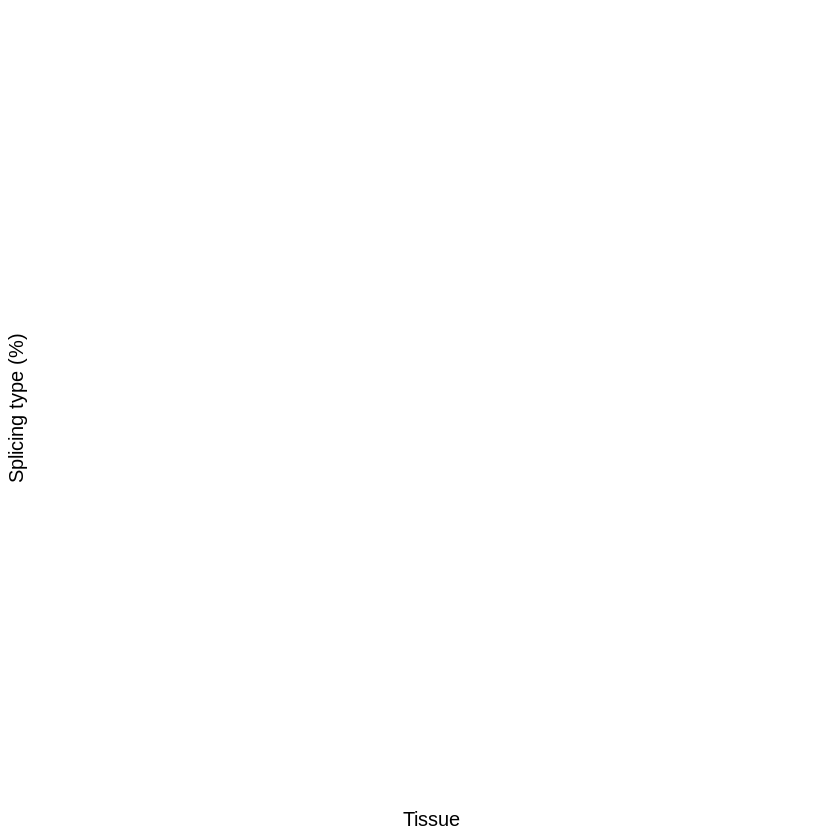

In [66]:
p<-ggplot(df_plot, 
       aes(x=Label, y=Perc, fill = ASE, by = Tissue)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Tissue")
p

In [18]:
ggsave(file = "../pdf/Figure2e.pdf", plot = p)

Saving 6.67 x 6.67 in image



## Figure 2extra - splicing by chromosome

Percentage is shown for the entire set of 631 investigated X chromosomal genes, as well as the subsets of 248 genes with differential expression (DE) and 166 with at least one AS event. P-values were derived with Fisher’s exact test comparing genes with DE or AS to the entire set of 631 genes

### Loading dependencies

In [19]:

library(viridis)
library(ggplot2)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

### Read in the rMATS results for parsing the gencode or other GTF

rMATS 3.2.5 parses the annotation file, gencode v.30 in this example, and creates the SE, RI, MXE, A3SS, A5SS events.

In [20]:
# a code block
getwd()
fromGTFSE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.SE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFSE.dat$AStype <- 'SE'
fromGTFRI.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.RI.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFRI.dat$AStype <- 'RI'
fromGTFMXE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.MXE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFMXE.dat$AStype <- 'MXE'
fromGTFA5SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A5SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA5SS.dat$AStype <- 'A5SS'
fromGTFA3SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A3SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA3SS.dat$AStype <- 'A3SS'

head(fromGTFSE.dat)
head(fromGTFMXE.dat)
head(fromGTFRI.dat)
head(fromGTFA3SS.dat)
head(fromGTFA5SS.dat)

[1] "/mnt/shared/gcp-user/session_data/sbas/jupyter"

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000034152.18,MAP2K3,chr17,+,21287990,21288091,21284709,21284969,21295674,21295769,SE
2,2,ENSG00000034152.18,MAP2K3,chr17,+,21303182,21303234,21302142,21302259,21304425,21304553,SE
3,3,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21287990,21288091,21296085,21296143,SE
4,4,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21287990,21288091,21298412,21298479,SE
5,5,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21284710,21284969,21296085,21296143,SE
6,6,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21284710,21284969,21298412,21298479,SE


,ID,GeneID,geneSymbol,chr,strand,X1stExonStart_0base,X1stExonEnd,X2ndExonStart_0base,X2ndExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000114062.19,UBE3A,chr15,-,25407066,25407262,25408619,25408684,25405460,25405502,25409087,25409207,MXE
2,2,ENSG00000181790.11,ADGRB1,chr8,+,142524237,142524304,142526541,142526627,142522640,142522710,142533294,142533466,MXE
3,3,ENSG00000159256.13,MORC3,chr21,+,36380230,36380318,36380625,36380682,36377409,36377507,36384729,36384829,MXE
4,4,ENSG00000077232.18,DNAJC10,chr2,+,182752548,182752623,182754702,182754805,182752071,182752188,182755002,182755104,MXE
5,5,ENSG00000149809.14,TM7SF2,chr11,+,65113219,65113414,65113490,65113594,65112810,65112865,65114712,65114832,MXE
6,6,ENSG00000149809.14,TM7SF2,chr11,+,65112810,65112865,65113219,65113414,65112514,65112711,65113490,65113594,MXE


,ID,GeneID,geneSymbol,chr,strand,riExonStart_0base,riExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000160223.17,ICOSLG,chr21,-,44226833,44230089,44226833,44229044,44230053,44230089,RI
2,2,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230933,161231116,161231245,RI
3,3,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230918,161231116,161231245,RI
4,4,ENSG00000114062.19,UBE3A,chr15,-,25333727,25340228,25333727,25339257,25340084,25340228,RI
5,5,ENSG00000100359.21,SGSM3,chr22,+,40408932,40409372,40408932,40409018,40409249,40409372,RI
6,6,ENSG00000100359.21,SGSM3,chr22,+,40408932,40409372,40408932,40409018,40409339,40409372,RI


,ID,GeneID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000034152.18,MAP2K3,chr17,+,21300470,21300658,21300544,21300658,21298877,21298926,A3SS
2,2,ENSG00000160223.17,ICOSLG,chr21,-,44222990,44229044,44222990,44223078,44230053,44230089,A3SS
3,3,ENSG00000143257.11,NR1I3,chr1,-,161230812,161230933,161230812,161230918,161231116,161231245,A3SS
4,4,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230918,161231328,161231474,A3SS
5,5,ENSG00000143257.11,NR1I3,chr1,-,161230812,161230933,161230812,161230918,161231328,161231474,A3SS
6,6,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230933,161231328,161231474,A3SS


,ID,GeneID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000125166.13,GOT2,chr16,-,58722118,58722278,58722149,58722278,58719195,58719255,A5SS
2,2,ENSG00000130182.8,ZSCAN10,chr16,-,3092541,3093004,3092676,3093004,3091763,3091828,A5SS
3,3,ENSG00000143257.11,NR1I3,chr1,-,161236458,161236598,161236529,161236598,161235846,161235977,A5SS
4,4,ENSG00000154265.16,ABCA5,chr17,-,69273942,69274128,69273958,69274128,69271161,69271289,A5SS
5,5,ENSG00000035928.16,RFC1,chr4,-,39351347,39351476,39351431,39351476,39345400,39345476,A5SS
6,6,ENSG00000127249.15,ATP13A4,chr3,-,193440489,193440637,193440557,193440637,193439022,193439065,A5SS


In [21]:
summaryAS.df <- rbind(fromGTFSE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFRI.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFMXE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA5SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA3SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")])

In [22]:
chr_specific_splicing_SE <- table(summaryAS.df$chr[summaryAS.df$AStype == "SE"])
a_chr_SE <- unclass(chr_specific_splicing_SE)
# a_chr_SE
chr_specific_splicing_RI <- table(summaryAS.df$chr[summaryAS.df$AStype == "RI"])
a_chr_RI <- unclass(chr_specific_splicing_RI)
# a_chr_RI
chr_specific_splicing_MXE <- table(summaryAS.df$chr[summaryAS.df$AStype == "MXE"])
a_chr_MXE <- unclass(chr_specific_splicing_MXE)
# a_chr_MXE
chr_specific_splicing_A3SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A3SS"])
a_chr_A3SS <- unclass(chr_specific_splicing_A3SS)
#a_chr_A3SS
chr_specific_splicing_A5SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
a_chr_A5SS <- unclass(chr_specific_splicing_A5SS)
print("A5SS (other examples commented out):")
table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
#a_chr_A5SS

[1] "A5SS (other examples commented out):"



 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  496   155   386   354    59   212   188   348   410    74   400   387   135 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   60   129   368   184   210   216   284   166   162   191    10 

In [23]:
chr_splicing_dist <- rbind(cbind(data.matrix(a_chr_SE),   chr=names(a_chr_SE),  AStype = "SE"),
                           cbind(data.matrix(a_chr_RI),   chr=names(a_chr_RI),  AStype = "RI"),
                           cbind(data.matrix(a_chr_MXE),  chr=names(a_chr_MXE), AStype = "MXE"),
                           cbind(data.matrix(a_chr_A3SS), chr=names(a_chr_A3SS),AStype = "A3SS"),
                           cbind(data.matrix(a_chr_A5SS), chr=names(a_chr_A5SS),AStype = "A5SS"))
colnames(chr_splicing_dist)=c("Counts","Chr","AStype")
counts <- chr_splicing_dist[,"Counts"]
chr_splicing_df <- data.frame(chr_splicing_dist)
head(chr_splicing_df)
chr_splicing_df$Counts <- as.integer(counts)
head(chr_splicing_df)
head(chr_splicing_df$Counts)

,Counts,Chr,AStype
,<fct>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


[1] 3812 1458 2541 2540  663 1551

In [24]:
dim(chr_splicing_dist)

[1] 120   3

In [25]:
chromosomes <- names(a_chr_SE)
chromosomes <- chromosomes[order(chromosomes)]
chromosomes

[1] "chr1"  "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17"
[10] "chr18" "chr19" "chr2"  "chr20" "chr21" "chr22" "chr3"  "chr4"  "chr5" 
[19] "chr6"  "chr7"  "chr8"  "chr9"  "chrX"  "chrY"

In [26]:
colnames(chr_splicing_dist)

[1] "Counts" "Chr"    "AStype"

In [27]:
chr_splicing_df[chr_splicing_df$Chr==chromosomes[1],]

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [28]:
#chr_splicing_df$Chr
sum(chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],"Counts"])

[1] 6060

In [29]:
df_chromosome     <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],]
df_chromosome

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [30]:
percentage <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
percentage

[1] 62.904290  9.966997  4.719472 14.224422  8.184818

In [31]:
df_plot <- data.frame()

for (i in 1:length(chromosomes)) {
    df_chromosome  <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[i],]
    percentage     <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
    final <- cbind(df_chromosome, Perc=percentage)
    if (i == 1)
        df_plot <- final 
    else
        df_plot <- rbind(df_plot, final)
}  

dim(df_plot)
head(df_plot)

[1] 120   4

,Counts,Chr,AStype,Perc
,<int>,<fct>,<fct>,<dbl>
chr1,3812,chr1,SE,62.904290
chr1.1,604,chr1,RI,9.966997
chr1.2,286,chr1,MXE,4.719472
chr1.3,862,chr1,A3SS,14.224422
chr1.4,496,chr1,A5SS,8.184818
chr10,1458,chr10,SE,70.096154


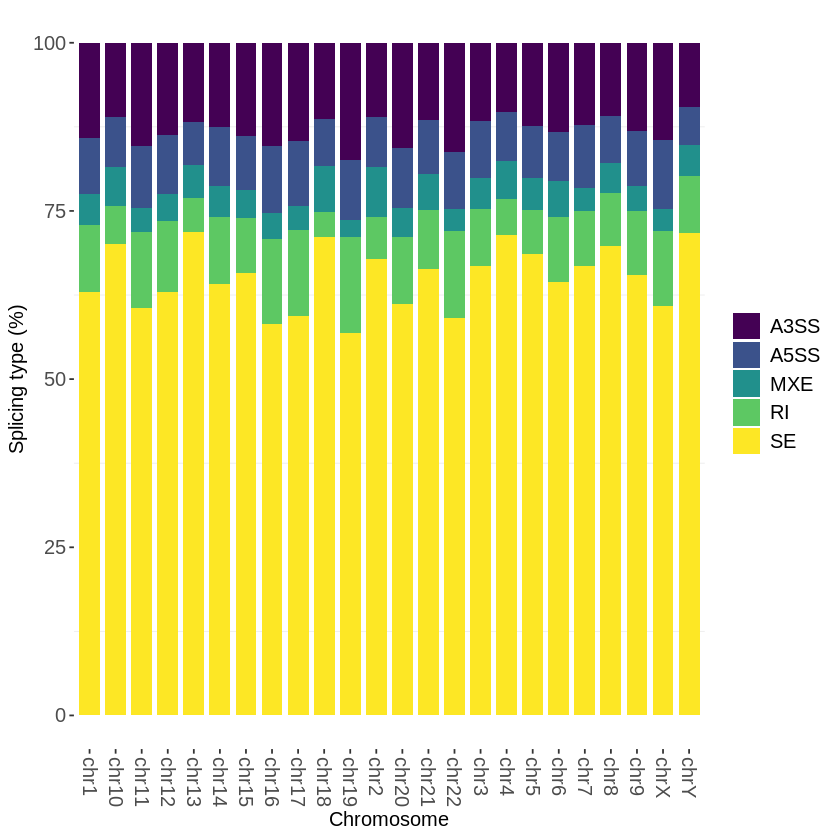

In [32]:
p<-ggplot(df_plot, 
       aes(x=Chr, y=Perc, fill = AStype, by = Chr)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Chromosome")
p

In [ ]:
ggsave(file = "../pdf/figureSplicingByChromosome.pdf", plot = p)

### Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'** (British spelling), files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [ ]:
figure_id   = "Figure2"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

### 2. Libraries metadata

In [ ]:

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]